## Desafio_1

Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='1200' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o site do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.(OK)

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAJED considerando as suas colunas.

8. Avançado: plote **todas as correlações das variávies numéricas entre si**. Sugestão busque uma biblioteca chamada SEABORN e plote um heatmap com as correlações.

<!--9. Avançado: Plote uma **regressão múltipla**.-->


# Item 1: Importar as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats as st
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importando somente as colunas importantes
df = pd.read_csv('cagedest_122018.txt',
                sep=';',
                encoding='cp1252',
                decimal=',',
                usecols=['Admitidos/Desligados',
                         'Grau Instrução',
                         'Idade',
                         'Raça Cor', 
                         'Salário Mensal',
                         'Sexo', 
                         'UF'])

df.head()

,Admitidos/Desligados,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo,UF
0,1,6,24,8,954.0,1,50
1,1,8,25,2,2500.0,1,50
2,1,2,55,8,0.0,1,50
3,1,2,52,8,0.0,1,50
4,1,2,32,8,0.0,1,50


In [3]:
#Renomeando as colunas
df.rename(columns={'Admitidos/Desligados':'admitidos_desligados',
                   'Salário Mensal': 'salario', 
                   'Grau Instrução': 'escolaridade',
                   'Raça Cor': 'raca',
                   'Sexo':'sexo',
                   'Idade':'idade'}, inplace=True)

In [4]:
df.head()

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF
0,1,6,24,8,954.0,1,50
1,1,8,25,2,2500.0,1,50
2,1,2,55,8,0.0,1,50
3,1,2,52,8,0.0,1,50
4,1,2,32,8,0.0,1,50


In [5]:
df.shape

(2256752, 7)

In [6]:
#Média 1,627 é maior que 75% dos dados, indicando acentuada assimetria positiva
df['salario'].describe()

count    2.256752e+06
mean     1.627244e+03
std      2.097521e+03
min      0.000000e+00
25%      1.066000e+03
50%      1.271000e+03
75%      1.600000e+03
max      1.428300e+05
Name: salario, dtype: float64

In [7]:
print(f'Mediana Salários: {df.salario.median():.02f}')
print(f'Média Salários:   {df.salario.mean():.02f}')

Mediana Salários: 1271.00
Média Salários:   1627.24


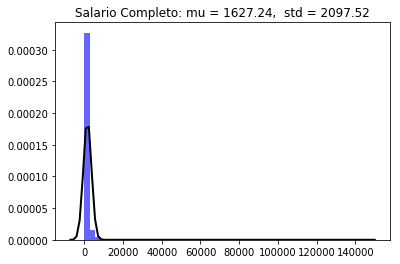

In [8]:
#Plotando Histograma da base completa de Salarios, incluindo Zeros e valores elevados
from scipy.stats import norm

# Generate some data for this demonstration.
data0 = df.salario

# Fit a normal distribution to the data:
mu, std = norm.fit(data0)

# Plot the histogram.
plt.hist(data0, bins=50, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Salario Completo: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [9]:
#Qtd de Salarios == 0
sum(df['salario']==0)

24245

In [10]:
df['salario'].max()

142830.0

In [11]:
#Teste de Shapiro para Verif da Normalidade considerando todos os Salarios
import numpy as np # linear algebraimport scipy
from scipy import stats

stats.shapiro(df['salario'])

(0.2637892961502075, 0.0)

# Item 2: Limpeza e transformação da variável alvo Salário Mensal

# Pelo teste de Shapiro a distribuição não é normal, por isso vamos utilizar técnicas de transformação para melhorar os resultados

(1627.0908000000002, 295.1577138203174)

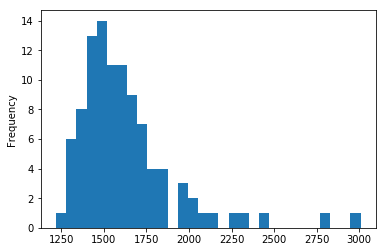

In [12]:
# Média das médias
#definindo uma função para tirar um sample 
def sample(df, n):
    index = np.random.choice(range(0, len(df)), size = n)
    df_s = np.array(df.iloc[index,])
    return(df_s)

# calculando a média dos samples
def samp_mean(df, sample_size, num_samples):
    means = []
    for reps in range(0, num_samples):
        s_ = sample(df, sample_size)
        m_ = s_.mean()
        means.append(m_)
    return(means)

# definindo o tamnho dos samples e da quantidade de samples
sample_size = 50
num_samples = 100

# definindo um DataFrame e plotando um histograma
sample_df = pd.Series(samp_mean(df['salario'], sample_size, num_samples))
sample_df.plot.hist(bins = 30)
# calculando as médias 
sample_df.mean(), sample_df.std()

In [13]:
#Describe da resultante da Média das Médias
sample_df.describe()

count     100.000000
mean     1627.090800
std       295.157714
min      1219.320000
25%      1432.695000
50%      1563.840000
75%      1703.890000
max      3008.040000
dtype: float64

In [14]:
#Teste de Shapiro para resultante da média das médias
import numpy as np # linear algebraimport scipy
from scipy import stats

stats.shapiro(sample_df)

(0.8127387166023254, 6.213981551539405e-10)

# Pela Média das Médias conseguimos normalizar os dados mas não conseguimos utilizar a variável por ser impossível interpretar os resultados.

# Para aplicar a técnica do Log, vamos desconsiderar os salários == 0 e analisá-los separadamente depois

In [15]:
df1 = df[df['salario']>0]

In [16]:
df1.head()

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF
0,1,6,24,8,954.0,1,50
1,1,8,25,2,2500.0,1,50
7,1,4,50,2,1061.0,2,50
11,1,7,22,8,1061.0,1,50
12,1,7,37,2,1061.0,1,50


In [17]:
df1.shape

(2232507, 7)

In [18]:
#Qtd de Salarios == 0 desconsiderados no df1 (1,07%)
print(len(df)-len(df1))
print((len(df)-len(df1))/len(df))

24245
0.010743316057767977


In [19]:
#continua com Assimetria Positiva
df1.salario.describe()

count    2.232507e+06
mean     1.644916e+03
std      2.101976e+03
min      2.870000e+02
25%      1.074000e+03
50%      1.278000e+03
75%      1.605000e+03
max      1.428300e+05
Name: salario, dtype: float64

# Aplicando Log

In [20]:
# aplicando o LOG na série de dados de salário > 0 e plotando uam distribuição
df1['log_salario'] = np.log(df1['salario'])

In [21]:
df1.head()

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF,log_salario
0,1,6,24,8,954.0,1,50,6.860664
1,1,8,25,2,2500.0,1,50,7.824046
7,1,4,50,2,1061.0,2,50,6.966967
11,1,7,22,8,1061.0,1,50,6.966967
12,1,7,37,2,1061.0,1,50,6.966967


In [22]:
df1.log_salario.describe()

count    2.232507e+06
mean     7.237505e+00
std      4.751255e-01
min      5.659482e+00
25%      6.979145e+00
50%      7.153052e+00
75%      7.380879e+00
max      1.186941e+01
Name: log_salario, dtype: float64

In [23]:
#Após Log
df1.shape

(2232507, 8)

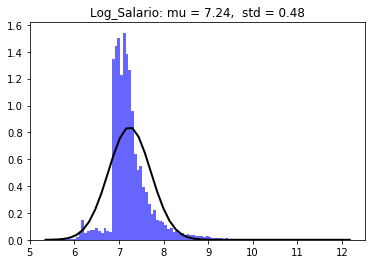

In [24]:
from scipy.stats import norm

# Generate some data for this demonstration.
data2 = df1.log_salario

# Fit a normal distribution to the data:
mu, std = norm.fit(data2)

# Plot the histogram.
plt.hist(data2, bins=100, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Log_Salario: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Teste de Shapiro após aplicar Log

In [25]:
import numpy as np # linear algebraimport scipy
from scipy import stats

stats.shapiro(df1['log_salario'])

(0.8477897644042969, 0.0)

# Normalizando o Log

In [26]:
df1['normal_log_salario'] = ( df1['log_salario'] - df1['log_salario'].mean() ) / df1['log_salario'].std()

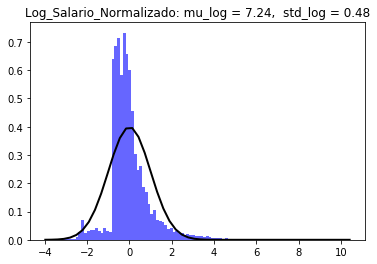

In [27]:
from scipy.stats import norm

# Generate some data for this demonstration.
data_normal = df1.normal_log_salario

# Fit a normal distribution to the data:
mu_log, std_log = norm.fit(data_normal)

# Plot the histogram.
plt.hist(data_normal, bins=100, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu_log, std_log)
plt.plot(x, p, 'k', linewidth=2)
title = "Log_Salario_Normalizado: mu_log = %.2f,  std_log = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Verificando o Z-score

In [28]:
# calculando o intervalo de confiança para os dados normalizados
# é esperado os valores de z_score
stats.norm.interval(alpha=0.95,loc=mu_log,scale=std_log)

(-1.959963545547422, 1.959963545621021)

In [29]:
# armazenando os dados em variáveis 
Z_score_inf = stats.norm.interval(alpha=0.95,loc=mu_log,scale=std_log)[0]
Z_score_sup = stats.norm.interval(alpha=0.95,loc=mu_log,scale=std_log)[1]
Z_score_inf,Z_score_sup

(-1.959963545547422, 1.959963545621021)

# Criando df2 somente com salários contidos no intervalo de confiança

In [68]:
df2=df1[(df1['normal_log_salario'] <= Z_score_sup) & (df1['normal_log_salario'] >= Z_score_inf)]
df2=df2.sort_values(by = 'normal_log_salario')

In [69]:
#Menor Salário dentro do I.C (Z=-1.96): R$549,00
df2.head(1)

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF,log_salario,normal_log_salario
2243958,1,7,22,4,549.0,1,22,6.308098,-1.956129


In [70]:
#Maior Salário dentro do I.C (Z=1.96): R$3.528,00
df2.tail(1)

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF,log_salario,normal_log_salario
1085570,2,8,29,8,3528.0,2,35,8.168486,1.959443


In [71]:
menor_salario=df2.salario.min()
maior_salario=df2.salario.max()
print(f'Qtd de salários dentro do Intervalo de Confiança (95%): {len(df2)}')
print(f'Menor Salário no Intervalo de Confiança (95%): R${menor_salario:.02f}')
print(f'Maior Salário no Intervalo de Confiança (95%): R${maior_salario:.02f}')
print(f'\033[7mConclusão:\033[m Por inferência, salários entre \033[7m R${menor_salario:.02f} e R${maior_salario:.02f} \033[m estão estatisticamente na média \033[7m p/ alfa=0,05 \033[m.')

Qtd de salários dentro do Intervalo de Confiança (95%): 2089010
Menor Salário no Intervalo de Confiança (95%): R$549.00
Maior Salário no Intervalo de Confiança (95%): R$3528.00
Conclusão: Por inferência, salários entre  R$549.00 e R$3528.00  estão estatisticamente na média  p/ alfa=0,05 .


# Item 3: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados

# Distribuição da variável Idade:

In [36]:
df.idade.describe()

count    2.256752e+06
mean     3.231423e+01
std      1.096019e+01
min      1.000000e+01
25%      2.300000e+01
50%      3.000000e+01
75%      3.900000e+01
max      1.030000e+02
Name: idade, dtype: float64

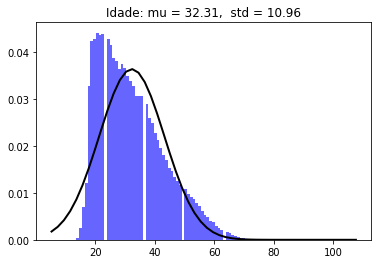

In [37]:
from scipy.stats import norm

# Generate some data for this demonstration.
data = df.idade

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=100, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Idade: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [38]:
#Teste de Shapiro para Verif da Normalidade considerando todos as idades
import numpy as np # linear algebraimport scipy
from scipy import stats

stats.shapiro(df['idade'])

(0.9411314725875854, 0.0)

Wall time: 0 ns


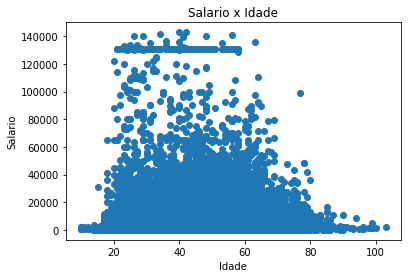

In [39]:
x = df['idade']
y = df['salario']

# Plot
%time
plt.scatter(x, y)
plt.title('Salario x Idade')
plt.xlabel('Idade')
plt.ylabel('Salario')
plt.show()

In [40]:
# Calculando a correlação (Pierson) entre as duas variáveis pelo scipy.stats
#Como o valor ficou prox de 0, a correlação é FRACA.

import scipy.stats
x = df['salario']
y = df['idade']

metodo_nutella = scipy.stats.pearsonr(x, y)
print(metodo_nutella[0])

0.15129436436275406


In [41]:
# Cálculo da covariância por numpy

from numpy import cov
x = df['salario']
y = df['idade']
cov(x, y)

array([[4.39959244e+06, 3.47813981e+03],
       [3.47813981e+03, 1.20125752e+02]])

# Item 4: Verifique os dados da variável Grau de Instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

In [42]:
df.escolaridade.value_counts()

7    1273281
9     254463
6     201068
5     199478
4     123314
8      89178
2      60639
3      47147
1       8184
Name: escolaridade, dtype: int64

In [43]:
len(df.escolaridade)

2256752

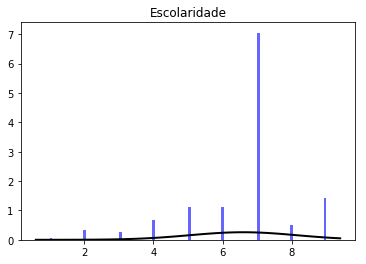

In [44]:
from scipy.stats import norm

# Generate some data for this demonstration.
data = df.escolaridade

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=100, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Escolaridade"
plt.title(title)

plt.show()

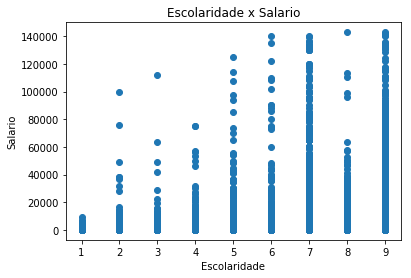

In [75]:
x = df['escolaridade']
y = df['salario']

# Plot
title = "Escolaridade x Salario"
plt.scatter(x, y )
plt.title(title)
plt.xlabel('Escolaridade')
plt.ylabel('Salario')
plt.show()

In [81]:
# Calculando a correlação (Pierson) entre as duas variáveis pelo scipy.stats
#Como o valor ficou prox de 0, a correlação é FRACA.

import scipy.stats
x = df['escolaridade']
y = df['salario']

metodo_nutella = scipy.stats.pearsonr(x, y)
print(metodo_nutella[0])

0.18470180695812688


In [79]:
# Cálculo da covariância por numpy

from numpy import cov
x = df['escolaridade']
y = df['salario']
cov(x, y)

array([[2.39797097e+00, 5.99928271e+02],
       [5.99928271e+02, 4.39959244e+06]])

# Item 5: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

In [48]:
df=df.sort_values(by = 'sexo')
df.sexo.value_counts()

1    1323127
2     933625
Name: sexo, dtype: int64

In [49]:
print(f'Homens: {(len(df[df.sexo==1])/len(df.sexo)):.04f}')
print(f'Mulheres: {(len(df[df.sexo==2])/len(df.sexo)):.04f}')

Homens: 0.5863
Mulheres: 0.4137


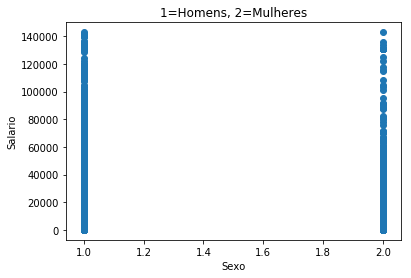

In [72]:
x = df['sexo']
y = df['salario']

# Plot
title = "1=Homens, 2=Mulheres"
plt.scatter(x, y)
plt.title(title)
plt.xlabel('Sexo')
plt.ylabel('Salario')
plt.show()

In [82]:
# Calculando a correlação (Pierson) entre as duas variáveis pelo scipy.stats
#Como o valor ficou prox de 0, a correlação é FRACA.

import scipy.stats
x = df['sexo']
y = df['salario']

metodo_nutella = scipy.stats.pearsonr(x, y)
print(metodo_nutella[0])

-0.04239430463953993


# Item 6: Verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

In [52]:
df=df.sort_values(by = 'raca')
df.raca.value_counts()

2    979869
8    815848
9    306806
4    133648
6     11011
1      9570
Name: raca, dtype: int64

In [53]:
len(df.raca)

2256752

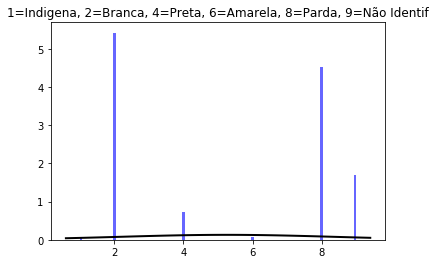

In [54]:
from scipy.stats import norm

# Generate some data for this demonstration.
data = df.raca

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=100, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "1=Indigena, 2=Branca, 4=Preta, 6=Amarela, 8=Parda, 9=Não Identif"
plt.title(title)

plt.show()

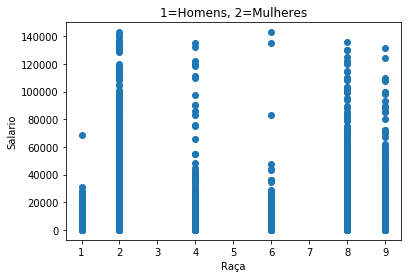

In [73]:
x = df['raca']
y = df['salario']

# Plot
plt.scatter(x, y)
plt.title(title)
plt.xlabel('Raça')
plt.ylabel('Salario')
plt.show()

In [74]:
# Calculando a correlação (Pierson) entre as duas variáveis pelo scipy.stats
#Como o valor ficou prox de 0, a correlação é FRACA.

import scipy.stats
x = df['raca']
y = df['salario']

metodo_nutella = scipy.stats.pearsonr(x, y)
print(metodo_nutella[0])

-0.0777269035730795


# Separando Salário Homens x Mulheres

In [121]:
#excluidos salario == 0

dfh=df1[df1.sexo==1]
dfm=df1[df1.sexo==2]

In [95]:
len(dfh)

1310312

In [89]:
len(dfm)

922195

In [96]:
dfh.salario.describe()

count    1.310312e+06
mean     1.718586e+03
std      2.155230e+03
min      2.870000e+02
25%      1.100000e+03
50%      1.331000e+03
75%      1.718000e+03
max      1.428300e+05
Name: salario, dtype: float64

In [93]:
dfm.salario.describe()

count    922195.000000
mean       1540.241696
std        2019.285051
min         287.000000
25%        1048.000000
50%        1225.000000
75%        1458.000000
max      142726.000000
Name: salario, dtype: float64

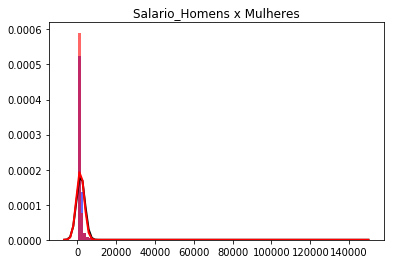

In [122]:
from scipy.stats import norm

# Generate some data for this demonstration.
datah = dfh.salario
datam = dfm.salario

# Fit a normal distribution to the data:
muh, stdh = norm.fit(datah)
mum, stdm = norm.fit(datam)

# Plot the histogram.
plt.hist(datah, bins=100, density=True, alpha=0.6, color='b')
plt.hist(datam, bins=100, density=True, alpha=0.6, color='r')


# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
ph = norm.pdf(x, muh, stdh)
plt.plot(x, ph, 'k', linewidth=2)
pm = norm.pdf(x, mum, stdm)
plt.plot(x, pm, 'r', linewidth=2)
title = "Salario_Homens x Mulheres"
plt.title(title)

plt.show()

In [123]:
#Teste de Shapiro para Verif da Normalidade considerando Salarios Homens Normalizados
import numpy as np # linear algebraimport scipy
from scipy import stats

stats.shapiro(dfh['salario'])

(0.2709869146347046, 0.0)

In [124]:
#Teste de Shapiro para Verif da Normalidade considerando Salarios Mulheres Normalizados
import numpy as np # linear algebraimport scipy
from scipy import stats

stats.shapiro(dfm['salario'])

(0.22465205192565918, 0.0)

# Aplicando Log

In [126]:
# aplicando o LOG na série de dados de salário > 0 e plotando uam distribuição
dfh['log_salario'] = np.log(dfh['salario'])
dfm['log_salario'] = np.log(dfm['salario'])

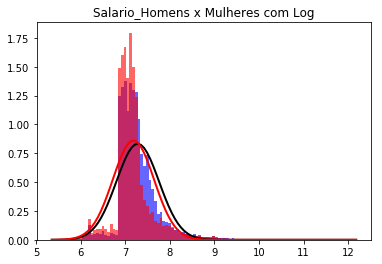

In [131]:
from scipy.stats import norm

# Generate some data for this demonstration.
datah_log = dfh.log_salario
datam_log = dfm.log_salario

# Fit a normal distribution to the data:
muh_log, stdh_log = norm.fit(datah_log)
mum_log, stdm_log = norm.fit(datam_log)

# Plot the histogram.
plt.hist(datah_log, bins=100, density=True, alpha=0.6, color='b')
plt.hist(datam_log, bins=100, density=True, alpha=0.6, color='r')


# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
ph_log = norm.pdf(x, muh_log, stdh_log)
plt.plot(x, ph_log, 'k', linewidth=2)
pm_log = norm.pdf(x, mum_log, stdm_log)
plt.plot(x, pm_log, 'r', linewidth=2)
title = "Salario_Homens x Mulheres com Log"
plt.title(title)

plt.show()

# Teste de Shapiro após Log Homem x Mulher

In [132]:
import numpy as np # linear algebraimport scipy
from scipy import stats

stats.shapiro(dfh['log_salario']) , stats.shapiro(dfm['log_salario'])

((0.8583380579948425, 0.0), (0.8463006019592285, 0.0))

In [ ]:
dfh2=dfh[(dfh['normal_log_salario'] <= Z_score_sup) & (dfh['normal_log_salario'] >= Z_score_inf)]
df2=df2.sort_values(by = 'normal_log_salario')

## Verificando o Z-score

In [120]:
# calculando o intervalo de confiança para os dados normalizados
# é esperado os valores de z_score
stats.norm.interval(alpha=0.95,loc=muh,scale=stdh)

(-1.8922243092789295, 2.060508269739705)

# Normalizando o Log para Homens e Mulheres

In [134]:
dfh['normal_log_salario'] = ( dfh['log_salario'] - dfh['log_salario'].mean() ) / dfh['log_salario'].std()
dfm['normal_log_salario'] = ( dfm['log_salario'] - dfm['log_salario'].mean() ) / dfm['log_salario'].std()

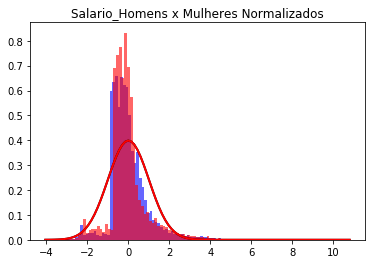

In [138]:
from scipy.stats import norm

# Generate some data for this demonstration.
datah_normal = dfh.normal_log_salario
datam_normal = dfm.normal_log_salario

# Fit a normal distribution to the data:
muh_normal, stdh_normal = norm.fit(datah_normal)
mum_normal, stdm_normal = norm.fit(datam_normal)

# Plot the histogram.
plt.hist(datah_normal, bins=100, density=True, alpha=0.6, color='b')
plt.hist(datam_normal, bins=100, density=True, alpha=0.6, color='r')


# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
ph_normal = norm.pdf(x, muh_normal, stdh_normal)
plt.plot(x, ph_normal, 'k', linewidth=2)
pm_normal = norm.pdf(x, mum_normal, stdm_normal)
plt.plot(x, pm_normal, 'r', linewidth=2)
title = "Salario_Homens x Mulheres Normalizados"
plt.title(title)

plt.show()

# Verificando o Z-Score

In [140]:
# calculando o intervalo de confiança para os dados normalizados
# é esperado os valores de z_score
stats.norm.interval(alpha=0.95,loc=muh_normal,scale=stdh_normal) , stats.norm.interval(alpha=0.95,loc=mum_normal,scale=stdm_normal)

((-1.9599632366172868, 1.9599632366667423),
 (-1.9599629218389223, 1.9599629219172352))

In [144]:
# armazenando os dados em variáveis 
Z_score_h_normal_inf = stats.norm.interval(alpha=0.95,loc=muh_normal,scale=stdh_normal)[0]
Z_score_m_normal_inf = stats.norm.interval(alpha=0.95,loc=mum_normal,scale=stdm_normal)[0]

Z_score_h_normal_sup = stats.norm.interval(alpha=0.95,loc=muh_normal,scale=stdm_normal)[1]
Z_score_m_normal_sup = stats.norm.interval(alpha=0.95,loc=mum_normal,scale=stdm_normal)[1]

Z_score_h_normal_inf, Z_score_h_normal_sup, Z_score_m_normal_inf, Z_score_m_normal_sup

(-1.9599632366172868,
 1.9599629219028065,
 -1.9599629218389223,
 1.9599629219172352)

# Criando dfh2 e dfm2 somente com salários H x M contidos no intervalo de confiança

In [146]:
dfh2=dfh[(dfh['normal_log_salario'] <= Z_score_h_normal_sup) & (dfh['normal_log_salario'] >= Z_score_h_normal_inf)]
dfm2=dfm[(dfm['normal_log_salario'] <= Z_score_m_normal_sup) & (dfm['normal_log_salario'] >= Z_score_m_normal_inf)]

dfh2=dfh2.sort_values(by = 'normal_log_salario')
dfm2=dfm2.sort_values(by = 'normal_log_salario')

In [149]:
#Menor Salário Homem dentro do I.C (Z=-1.96): R$566,00
dfh2.head(1)

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF,log_salario,normal_log_salario
1306577,2,6,16,8,566.0,1,35,6.338594,-1.959686


In [150]:
#Menor Salário Mulher dentro do I.C (Z=-1.96): R$530,00
dfm2.head(1)

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF,log_salario,normal_log_salario
1717351,2,6,43,2,530.0,2,31,6.272877,-1.958523


In [151]:
#Maior Salário Homem dentro do I.C (Z=-1.96): R$3.701,00
dfh2.tail(1)

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF,log_salario,normal_log_salario
1047187,2,7,29,2,3701.0,1,35,8.216358,1.959657


In [152]:
#Maior Salário Mulher dentro do I.C (Z=-1.96): R$3.529,00
dfm2.tail(1)

,admitidos_desligados,escolaridade,idade,raca,salario,sexo,UF,log_salario,normal_log_salario
1514393,2,9,37,4,3259.0,2,33,8.089176,1.959922


In [158]:
menor_salario_h=dfh2.salario.min()
maior_salario_h=dfh2.salario.max()

menor_salario_m=dfm2.salario.min()
maior_salario_m=dfm2.salario.max()

print(f'Qtd de salários H dentro do Intervalo de Confiança (95%): {len(dfh2)}')
print(f'Qtd de salários M dentro do Intervalo de Confiança (95%): {len(dfm2)}')
print('\n')
print(f'Menor Salário H x M no Intervalo de Confiança (95%): R${menor_salario_h:.02f}(H) x R${menor_salario_m}(M)')
print(f'Maior Salário H x M no Intervalo de Confiança (95%): R${maior_salario_h:.02f}(H) x R${maior_salario_m}(M)')
print('\n')
print(f'\033[7mConclusão:\033[m Por inferência, salários Mulheres são menores que salários Homens.')

Qtd de salários H dentro do Intervalo de Confiança (95%): 1229163
Qtd de salários M dentro do Intervalo de Confiança (95%): 857799


Menor Salário H x M no Intervalo de Confiança (95%): R$566.00(H) x R$530.0(M)
Maior Salário H x M no Intervalo de Confiança (95%): R$3701.00(H) x R$3259.0(M)


Conclusão: Por inferência, salários Mulheres são menores que salários Homens.
